# **[OK]**

In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['nama', 'gender']].values.tolist()

In [50]:
name_check = data['nama']
vocab = set(' '.join([str(i) for i in name_check]))
vocab.add('END')
len_vocab = len(vocab)

print(vocab)
print("vocab length is ",len_vocab)
print ("length of input is ",len(data))

{'x', 'f', 'y', 'v', 'g', 'u', 't', 'd', 'h', 'p', 'e', 'q', '0', 'END', 'w', '.', '-', 'o', 'z', 'r', 'n', 'i', 'a', 'j', "'", 's', 'm', 'c', 'l', ' ', 'k', 'b'}
vocab length is  32
length of input is  624235


In [51]:
max_len = 60

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=max_len, padding='post')[0]
    return vector

In [52]:
x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=(max_len, 1)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
3902/3902 [==============================] - 99s 25ms/step - loss: 0.0802 - accuracy: 0.9699 - val_loss: 0.1716 - val_accuracy: 0.9356
Epoch 2/20
3902/3902 [==============================] - 97s 25ms/step - loss: 0.0783 - accuracy: 0.9703 - val_loss: 0.1714 - val_accuracy: 0.9338
Epoch 3/20
3902/3902 [==============================] - 97s 25ms/step - loss: 0.0768 - accuracy: 0.9709 - val_loss: 0.1777 - val_accuracy: 0.9331
Epoch 4/20
3902/3902 [==============================] - 98s 25ms/step - loss: 0.0751 - accuracy: 0.9716 - val_loss: 0.1824 - val_accuracy: 0.9331
Epoch 5/20
3902/3902 [==============================] - 93s 24ms/step - loss: 0.0740 - accuracy: 0.9720 - val_loss: 0.1839 - val_accuracy: 0.9326
Epoch 6/20
3902/3902 [==============================] - 96s 25ms/step - loss: 0.0728 - accuracy: 0.9723 - val_loss: 0.1851 - val_accuracy: 0.9327
Epoch 7/20
3902/3902 [==============================] - 96s 25ms/step - loss: 0.0718 - accuracy: 0.9727 - val_loss: 0.1847 -

In [22]:
model.save('../../models/gender-cnn-base.h5')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29, 64)            1728      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 51,649
Trainable params: 51,649
Non-trainable params: 0
_________________________________________________________________


In [24]:
score = model.evaluate(x_train, y_train, batch_size=64)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

9754/9754 [==============================] - 107s 11ms/step - loss: 0.0871 - accuracy: 0.9688

ACCURACY: 0.9687795639038086
LOSS: 0.08711425960063934


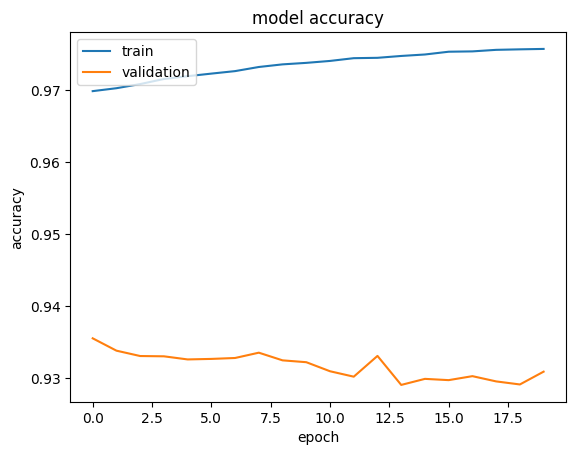

In [25]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

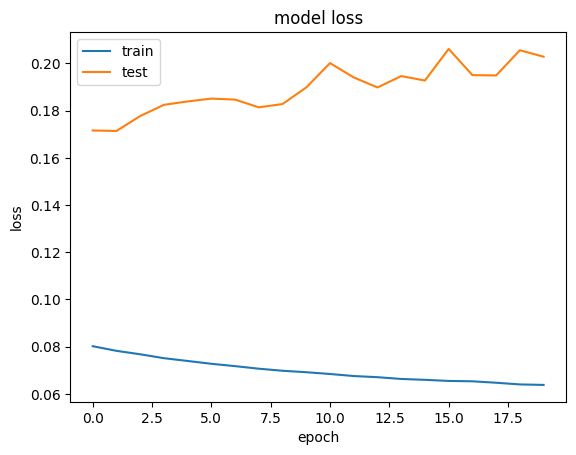

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
import numpy as np
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
accuracy = accuracy_score(y_train, labels_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

19508/19508 [==============================] - 118s 6ms/step
Accuracy: 96.88%


In [28]:
print(classification_report(y_train, labels_pred, digits=5))

              precision    recall  f1-score   support

           0    0.97052   0.96901   0.96976    322536
           1    0.96692   0.96854   0.96773    301702

    accuracy                        0.96878    624238
   macro avg    0.96872   0.96877   0.96875    624238
weighted avg    0.96878   0.96878   0.96878    624238



In [1]:
import tensorflow as tf
import numpy as np
    
model = tf.keras.models.load_model('../../models/gender-lstm-base.h5')

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence
    
def predict_gender(name):
    name_vector = np.array(name_to_vector(name))
    padded_name_vector = tf.keras.preprocessing.sequence.pad_sequences([name_vector], maxlen=29, padding='post', truncating='post')
    prediction = model.predict(padded_name_vector)
    
    if prediction < 0.5:
        return 'Male'
    else:
        return 'Female'

nama = [
    'Novi', 
    'Novia Kumala Sari', 
    'Novianto Rahmadi', 
    'Melani', 
    'Malik', 
    'Melani Malik', 
    'Annisa Rahmadi', 
    'Annisa Rahma Adi', 
    'Annisa', 
    'Rahmadi',
    'Putra Saputri', 
    'Putri Saputra', 
    'Rizki Saputri', 
    'Dwi Syafutra', 
]

for i in nama:
    print(i + ' = ' + predict_gender(i))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-28 10:13:09.154385: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 311ms/step
Novi = Female
1/1 [==============================] - 0s 14ms/step
Novia Kumala Sari = Female
1/1 [==============================] - 0s 14ms/step
Novianto Rahmadi = Male
1/1 [==============================] - 0s 15ms/step
Melani = Female
1/1 [==============================] - 0s 14ms/step
Malik = Female
1/1 [==============================] - 0s 13ms/step
Melani Malik = Female
1/1 [==============================] - 0s 17ms/step
Annisa Rahmadi = Female
1/1 [==============================] - 0s 14ms/step
Annisa Rahma Adi = Female
1/1 [==============================] - 0s 17ms/step
Annisa = Female
1/1 [==============================] - 0s 16ms/step
Rahmadi = Male
1/1 [==============================] - 0s 16ms/step
Putra Saputri = Female
1/1 [==============================] - 0s 14ms/step
Putri Saputra = Male
1/1 [==============================] - 0s 15ms/step
Rizki Saputri = Female
1/1 [==============================] - 0s 14ms/step
Dwi S

In [ ]:
%pip install pydot

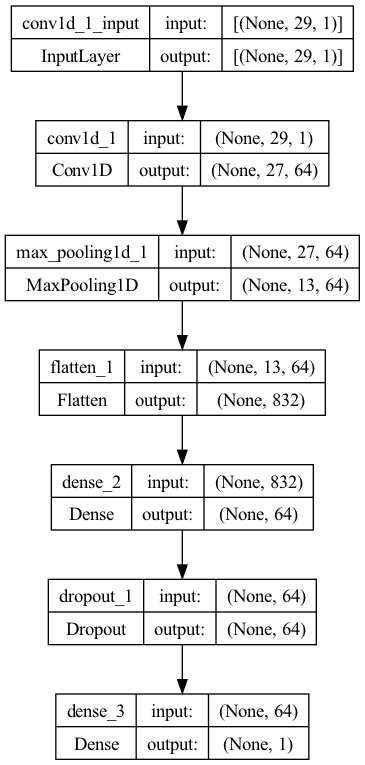

In [7]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=(29, 1)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

plot_model(model, to_file='../../assets/model-keras-cnn.png', show_shapes=True, show_layer_names=True)

2023-04-26 04:17:51.255235: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


19508/19508 [==============================] - 105s 5ms/step


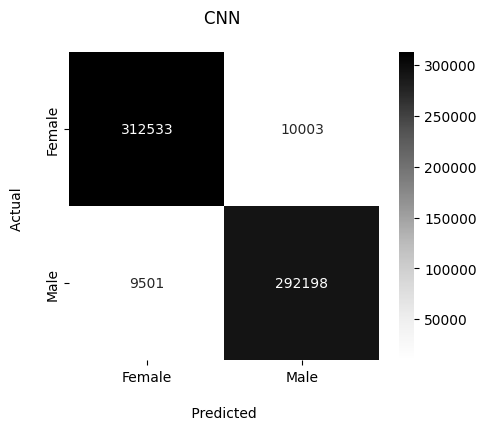

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['nama', 'gender']].values.tolist()

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

model = tf.keras.models.load_model('../../models/gender-cnn-base.h5')
labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
cm = confusion_matrix(y_train, labels_pred)

plt.figure(figsize=(5,4))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Greys")
fx.set_title('CNN \n');
fx.set_xlabel('\n Predicted \n')
fx.set_ylabel('Actual \n');
fx.xaxis.set_ticklabels(['Female','Male'])
fx.yaxis.set_ticklabels(['Female','Male'])
plt.show()